## Selecting number of PCs

In [2]:
import sys
!{sys.executable} -m pip install kneed

  Using cached kneed-0.8.5-py3-none-any.whl.metadata (5.5 kB)
Using cached kneed-0.8.5-py3-none-any.whl (10 kB)


In [3]:
# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# import PCA
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# import knee detection algorithm
from kneed import KneeLocator

# set sns theme and set pandas to display all rows and columns
sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 6]

## Load the dataset

/var/folders/34/4mb6rzb52l76jcqm_pjx3fph0000gn/T/ipykernel_11663/1858711220.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


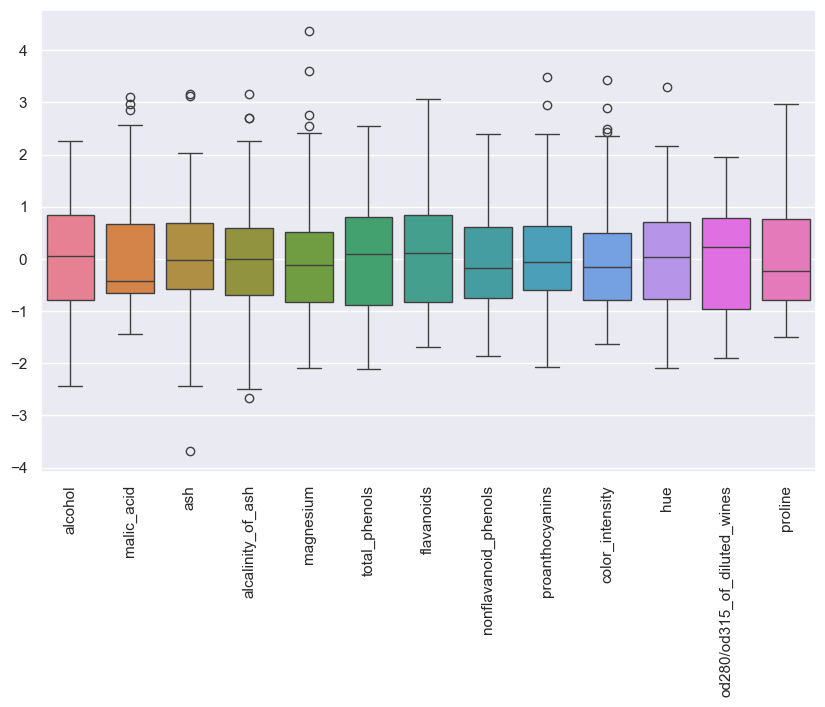

In [4]:
# Load the wine dataset
wine_data = load_wine()

wine_df_numeric = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

wine_df = wine_df_numeric.copy()
wine_df['label'] = wine_data.target

# Normalize the data
standard_scaler = StandardScaler()
standard_scaler.fit(wine_df_numeric)
wine_df_numeric_scaled = standard_scaler.transform(wine_df_numeric)

# Create data df
wine_df_numeric = pd.DataFrame(
    wine_df_numeric_scaled, 
    columns = wine_df_numeric.columns
)

g = sns.boxplot(wine_df_numeric)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

## n_components parameter

In [5]:
# Run full PCA
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
print('\nVariances explained by components:')

[var_ration*100 for var_ration in pca.explained_variance_ratio_]

Number of PCA components 13

Variances explained by components:


[np.float64(36.19884809992634),
 np.float64(19.207490257008942),
 np.float64(11.123630536249985),
 np.float64(7.069030182714033),
 np.float64(6.563293679648599),
 np.float64(4.935823319222569),
 np.float64(4.238679322623321),
 np.float64(2.680748948378867),
 np.float64(2.222153404789713),
 np.float64(1.9300190939440804),
 np.float64(1.7368356899899136),
 np.float64(1.2982325756042123),
 np.float64(0.7952148898994503)]

In [6]:
# Perform PCA and choose two components
pca = PCA(n_components=2)
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
print('\nVariances explained by components:')

[var_ration*100 for var_ration in pca.explained_variance_ratio_]

Number of PCA components 2

Variances explained by components:


[np.float64(36.19884809992634), np.float64(19.207490257008942)]

In [7]:
# Perform PCA and choose number of components based on desired percent of explained variance
pca = PCA(n_components=0.7)
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

print('\nVariances explained by components:')
print([var_ration*100 for var_ration in pca.explained_variance_ratio_])

explained_sum = sum([var_ration*100 for var_ration in pca.explained_variance_ratio_])
print('\nTotal variance explained by returned components : {}'.format(explained_sum))


Number of PCA components 4

Variances explained by components:
[np.float64(36.19884809992634), np.float64(19.207490257008942), np.float64(11.123630536249985), np.float64(7.069030182714033)]

Total variance explained by returned components : 73.5989990758993


## Selecting right number of principle components - cumulative variance

Number of PCA components 13


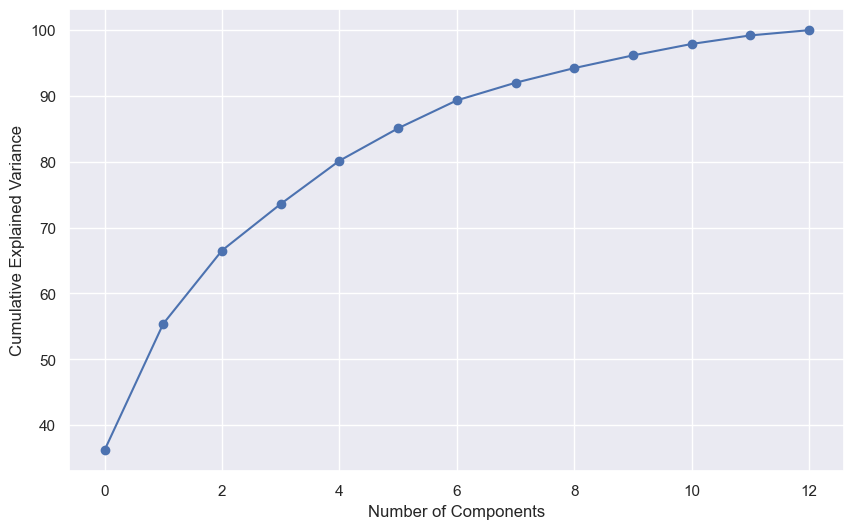

In [8]:
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.scatter(range(len(cumulative_explained_variance)),cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## Selecting right number of principle components - elbow method



In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')

mnist_data = mnist.data.values
mnist_label = mnist.target

In [10]:
mnist_data.shape

(70000, 784)

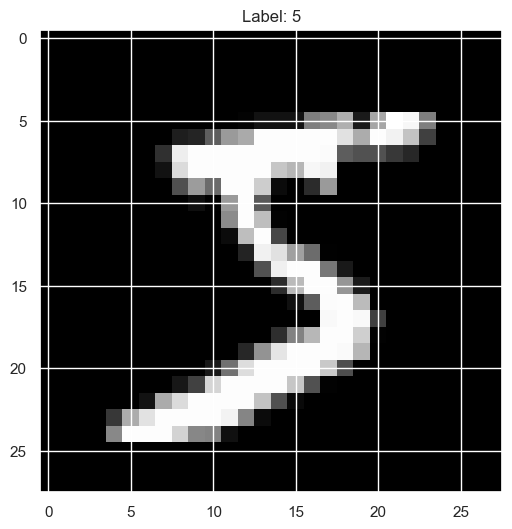

In [11]:
# Reshape image
image = np.reshape(mnist_data[0,:], [28,28])

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

In [12]:
# Custom normalization
mnist_data = mnist_data/255

Number of PCA components 784


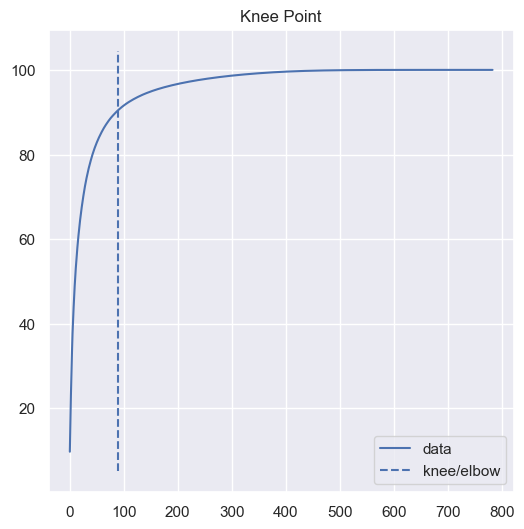

In [13]:
# Perform PCA
pca = PCA()
pca.fit(mnist_data)
pca_transformed_data = pca.transform(mnist_data)

print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

kneedle = KneeLocator(
    range(len(cumulative_explained_variance)), 
    cumulative_explained_variance, 
    curve="concave", 
    direction="increasing"
)
kneedle.plot_knee()

In [14]:
kneedle.elbow

np.int64(90)

In [ ]:
# If we do not perform inverse transform : 

# pca.components_ = pca.components_[kneedle.elbow, :]

In [15]:
# Perform PCA
pca = PCA(n_components=kneedle.elbow)
pca.fit(mnist_data)
pca_transformed_data = pca.transform(mnist_data)

In [16]:
pca_transformed_data.shape

(70000, 90)

In [17]:
reverse_transformed_data = pca.inverse_transform(pca_transformed_data)
unscaled_data = reverse_transformed_data * 255 

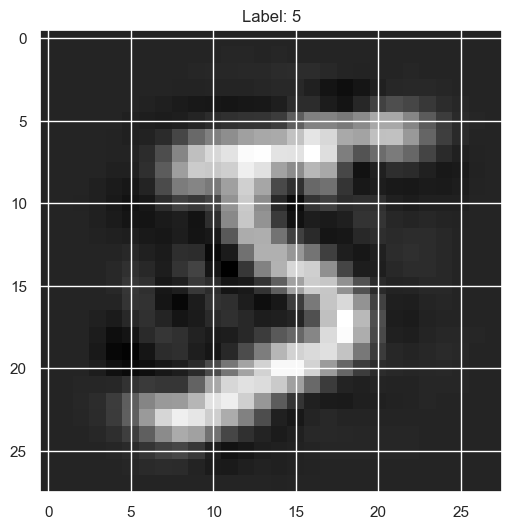

In [18]:
image = np.reshape(unscaled_data[0,:], [28,28])

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

## Denoise with PCA

In [19]:
mnist = fetch_openml('mnist_784', parser='auto')

mnist_data = mnist.data.values
mnist_label = mnist.target

In [20]:
mnist_data = mnist_data/255

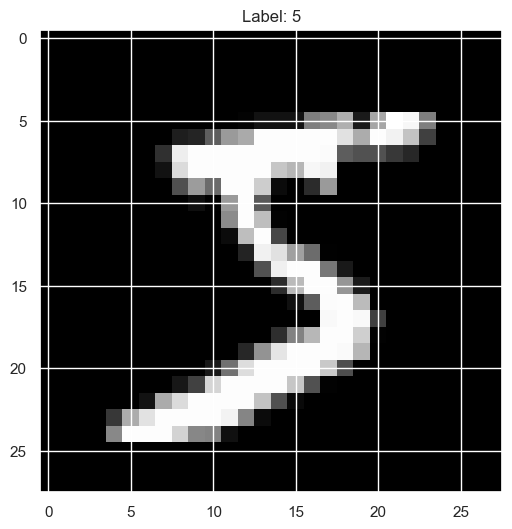

In [21]:
image = np.reshape(mnist_data[0,:], [28,28])

plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

In [22]:
noise = np.random.normal(0, 0.2, mnist_data.shape)
mnist_data_noisy = mnist_data + noise

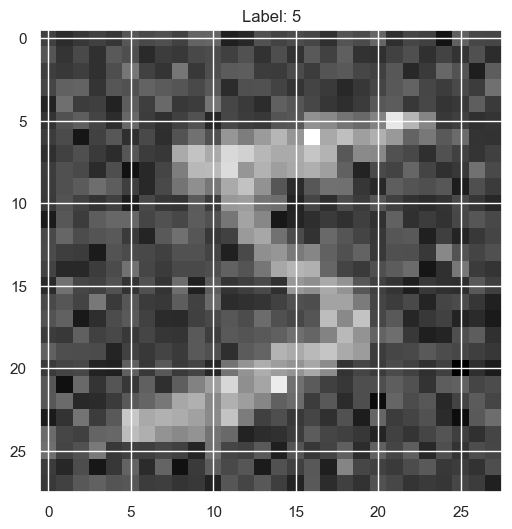

In [23]:
image = np.reshape(mnist_data_noisy[0,:], [28,28])

plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

Number of PCA components 784


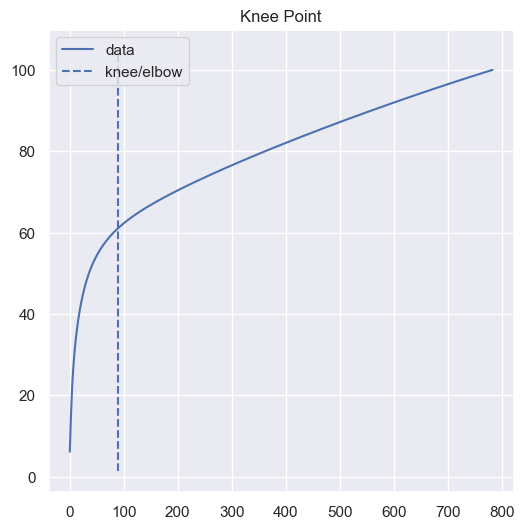

In [24]:
# Denoise with PCA
pca = PCA()
pca.fit(mnist_data_noisy)
pca_transformed_data = pca.transform(mnist_data_noisy)
print('Number of PCA components {}'.format(pca_transformed_data.shape[1]))
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)*100

kneedle = KneeLocator(
    range(len(cumulative_explained_variance)), 
    cumulative_explained_variance, 
    S=1.0, 
    curve="concave", 
    direction="increasing"
)
kneedle.plot_knee()

In [25]:
kneedle.elbow

np.int64(90)

In [26]:
pca = PCA(n_components=kneedle.elbow)
pca.fit(mnist_data_noisy)
pca_transformed_data = pca.transform(mnist_data_noisy)

In [27]:
pca_transformed_data.shape

(70000, 90)

In [28]:
reverse_transformed_data = pca.inverse_transform(pca_transformed_data)
unscaled_data = reverse_transformed_data * 255 

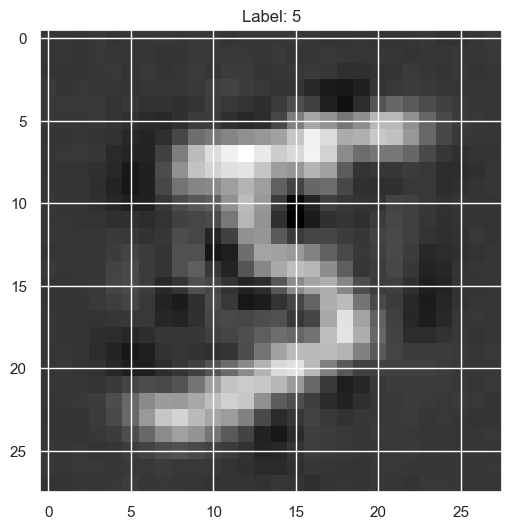

In [29]:
image = np.reshape(unscaled_data[0,:], [28,28])

plt.imshow(image, cmap='gray')
plt.title(f"Label: {mnist_label[0]}")
plt.show()

### Display digits dataset with PCA

In [30]:
pca = PCA()
pca.fit(mnist_data)
pca.explained_variance_ratio_[:2]*100

array([9.74611592, 7.15544459])

Text(0, 0.5, 'PC1 [7.1 % variance]')

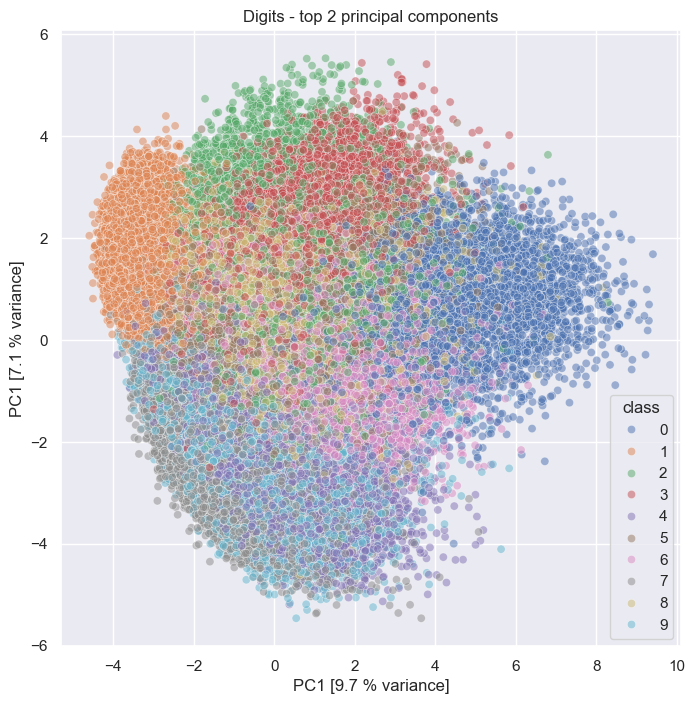

In [31]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=pca_transformed_data[:,0], y=pca_transformed_data[:,1], hue=mnist_label, alpha=0.5)

plt.title('Digits - top 2 principal components')
plt.xlabel('PC1 [9.7 % variance]')
plt.ylabel('PC1 [7.1 % variance]')